In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
resolution = 5000
flank=200000

In [3]:
clr_1 = cooler.Cooler(f'DNaseC_C2D5_blk.mcool::/resolutions/{resolution}')
clr_2 = cooler.Cooler(f'DNaseC_C2D5_hCTCF.mcool::/resolutions/{resolution}')
clr_3 = cooler.Cooler(f'DNaseC_C2D5_delZF1.mcool::/resolutions/{resolution}')
clr_4 = cooler.Cooler(f'DNaseC_C2D5_del578.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT_noheader.bedpe', schema='bedpe')
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

sites = bioframe.read_table('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/fig4/pileup/R2/CTCF_loop.bedpe', schema='bedpe')

In [6]:
expected_1 = expected_cis(
    clr_1,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000,
    nproc=80
)

In [7]:
pup_1 = coolpup.pileup(
    clr_1,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
    expected_df=expected_1,
#     nshifts=10,
    flank=flank,
    mindist=5000,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 177
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 531
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 124
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr19_q', 'chr19_q'): 158
INFO:coolpuppy:('chr2_p', 'chr2_p'): 399
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


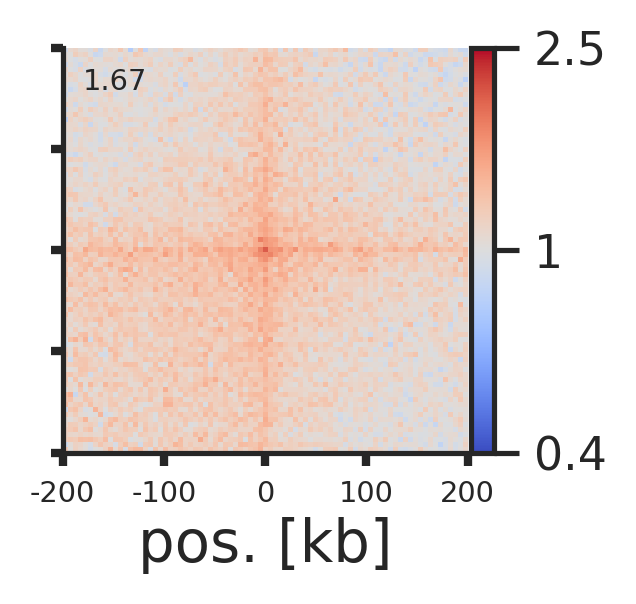

In [8]:
fig_1 = plotpup.plot(
    pup_1,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=2.5,
    vmin=0.4,
    height=2,
    plot_ticks=True
)

fig_1.savefig('blk.pdf')

In [9]:
expected_2 = expected_cis(
    clr_2,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000,
    nproc=80
)

In [10]:
pup_2 = coolpup.pileup(
    clr_2,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
    expected_df=expected_2,
#     nshifts=10,
    flank=flank,
    mindist=5000,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 177
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 531
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 124
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr19_q', 'chr19_q'): 158
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr2_p', 'chr2_p'): 399
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


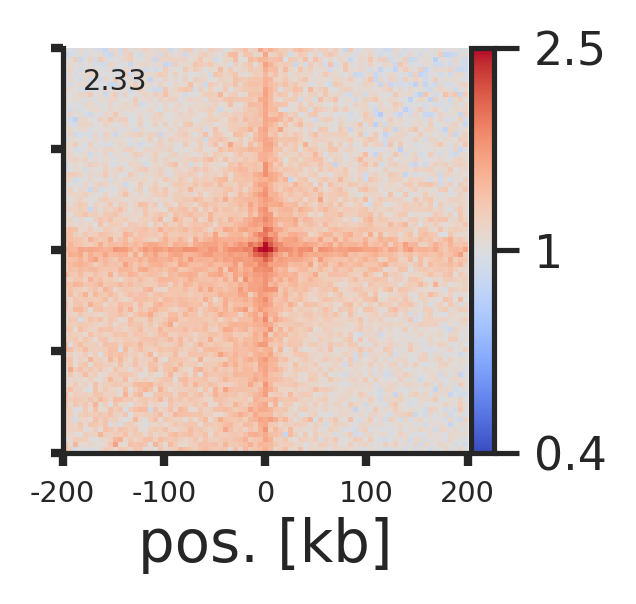

In [11]:
fig_2 = plotpup.plot(
    pup_2,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=2.5,
    vmin=0.4,
    height=2,
    plot_ticks=True
)

fig_2.savefig('hCTCF.pdf')

In [12]:
# pup_divide_1 = divide_pups(pup_2, pup_1)

# fig_divide_1 = plotpup.plot(
#     pup_divide_1,
#     score=True,
#     cmap='coolwarm',
#     scale='log',
#     sym=True,
#     vmax=5,
#     vmin=0.2,
#     height=2,
#     plot_ticks=True
# )

# # fig_divide_1.savefig('R3D7_dTAG-DMSO.pdf')

In [13]:
expected_3= expected_cis(
    clr_3,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000,
    nproc=80
)

In [14]:
pup_3 = coolpup.pileup(
    clr_3,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
    expected_df=expected_3,
#     nshifts=10,
    flank=flank,
    mindist=5000,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 177
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 531
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 124
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr19_q', 'chr19_q'): 158
INFO:coolpuppy:('chr2_p', 'chr2_p'): 399
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


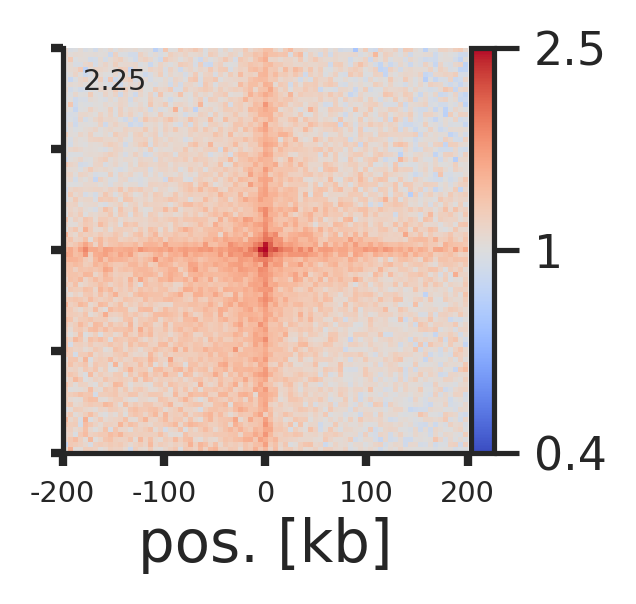

In [15]:
fig_3 = plotpup.plot(
    pup_3,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=2.5,
    vmin=0.4,
    height=2,
    plot_ticks=True
)

fig_3.savefig('ZF1.pdf')

In [16]:
expected_4 = expected_cis(
    clr_4,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000,
    nproc=80
)

In [17]:
pup_4 = coolpup.pileup(
    clr_4,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
    expected_df=expected_4,
#     nshifts=10,
    flank=flank,
    mindist=5000,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 177
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 531
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 124
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr19_q', 'chr19_q'): 158
INFO:coolpuppy:('chr2_p', 'chr2_p'): 399
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


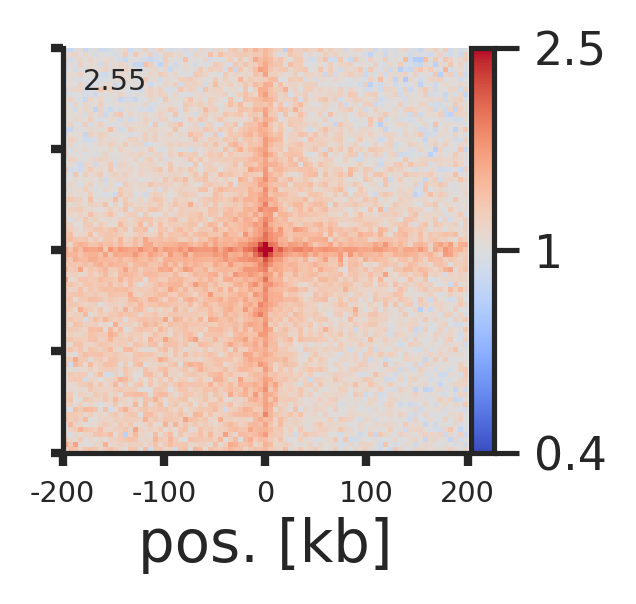

In [18]:
fig_4 = plotpup.plot(
    pup_4,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=2.5,
    vmin=0.4,
    height=2,
    plot_ticks=True
)

fig_4.savefig('578.pdf')

In [19]:
# pup_divide_2 = divide_pups(pup_4, pup_3)

# fig_divide_2 = plotpup.plot(
#     pup_divide_2,
#     score=True,
#     cmap='coolwarm',
#     scale='log',
#     sym=True,
#     vmax=5,
#     vmin=0.2,
#     height=2,
#     plot_ticks=True
# )

# # fig_divide_2.savefig('C2D5_dTAG-DMSO.pdf')